# *Analyzing Portfolio Risk and Return*


## Import the Data
Use the `whale_analysis.ipynb` file to complete the following steps:
1. Import the required libraries and dependencies.
2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.
3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

#### Step 1: Import the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline


#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame
nav_df= pd.read_csv(
    Path('./Resources/whale_navs.csv'),
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True
)

display(nav_df.head())
display(nav_df.tail())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,31.546221,14.364969,63.319419,64.668648,342.57
2020-09-08,31.491425,14.337851,63.238988,64.344083,333.21
2020-09-09,31.526541,14.368297,63.409792,64.460992,339.79
2020-09-10,31.486896,14.388256,63.308920,64.306412,333.89
2020-09-11,31.473747,14.360482,63.281442,64.241088,334.06


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [3]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
daily_returns= nav_df.pct_change().dropna()
display(daily_returns.head())
display(daily_returns.mean())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


SOROS FUND MANAGEMENT LLC     -0.000009
PAULSON & CO.INC.             -0.000026
TIGER GLOBAL MANAGEMENT LLC    0.000036
BERKSHIRE HATHAWAY INC         0.000147
S&P 500                        0.000429
dtype: float64

---

# Quantative Analysis
The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

##  Analyze the Performance

Analyze the data to `determine if any of the portfolios outperform the broader stock market`, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500
2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500.
3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily returns- Portfolios vs. S&P500'}, xlabel='date'>

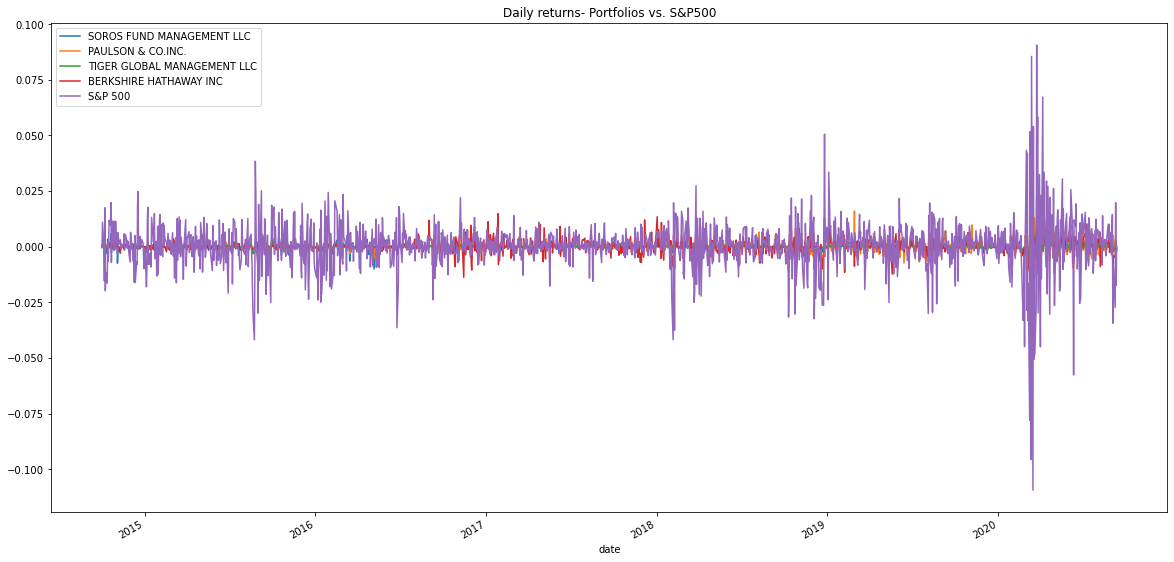

In [4]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
display(daily_returns.plot.line(figsize= (20,10), title= "Daily returns- Portfolios vs. S&P500"))



### Above plot visualizes the daily return data over the period. The plot shows the high and low spikes related to the daily performance of the S&P 500 and the 4 portfolis, where S&P 500 had the most volatility or fluctuation.


#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [5]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
cumulative_returns= (1 + daily_returns).cumprod()
display(cumulative_returns.tail())
display(cumulative_returns.mean())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


SOROS FUND MANAGEMENT LLC      0.967653
PAULSON & CO.INC.              0.990270
TIGER GLOBAL MANAGEMENT LLC    1.012684
BERKSHIRE HATHAWAY INC         1.090986
S&P 500                        1.289820
dtype: float64

#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Cumulative returns'}, xlabel='date'>

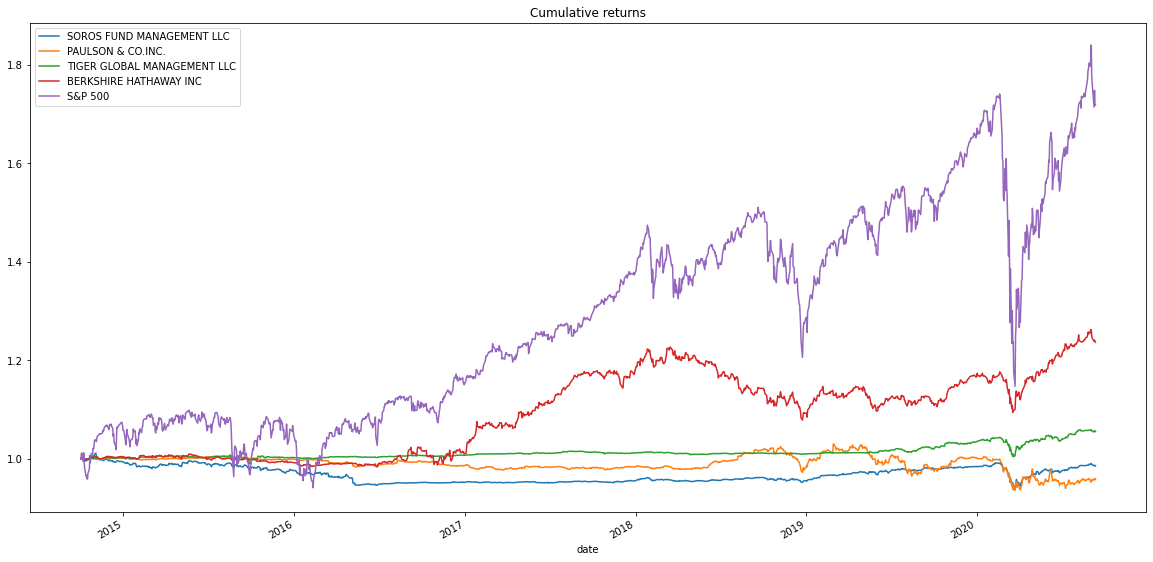

In [28]:
# Visualize the cumulative returns using the Pandas plot function
cumulative_returns.plot.line(figsize= (20,10), title= "Cumulative returns")

#### Step 4: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Observation:
Looking  at the the cumulative return data and the visualization plots, none of the four fund portfolios outperform the S&P 500, with cumulative returns of 1.718858. However "BERKSHIRE HATHAWAY INC"  with cumulative returns of 1.236625 performed the best over the period as compared to other portfolios.

---

## Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot.
2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. 

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily returns for Portfolios vs. S&P 500'}>

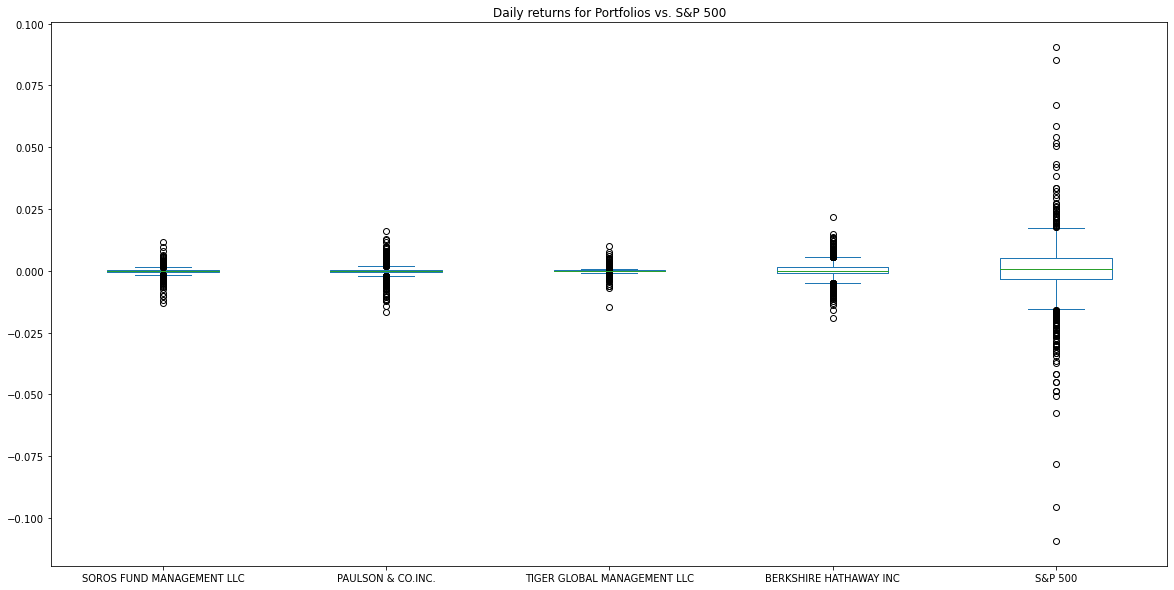

In [29]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
daily_returns.plot(kind= 'box', figsize= (20,10), title= "Daily returns for Portfolios vs. S&P 500")          

#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [30]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
daily_returns_portfolio= daily_returns.drop(columns=['S&P 500'])
daily_returns_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171
2014-10-03,0.001052,0.000368,0.000394,0.001248
2014-10-06,0.002456,-0.000008,0.000066,0.000267
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587
2014-10-08,0.000390,0.000369,0.000242,0.000842


<AxesSubplot:title={'center':'Daily returns for Portfolios'}>

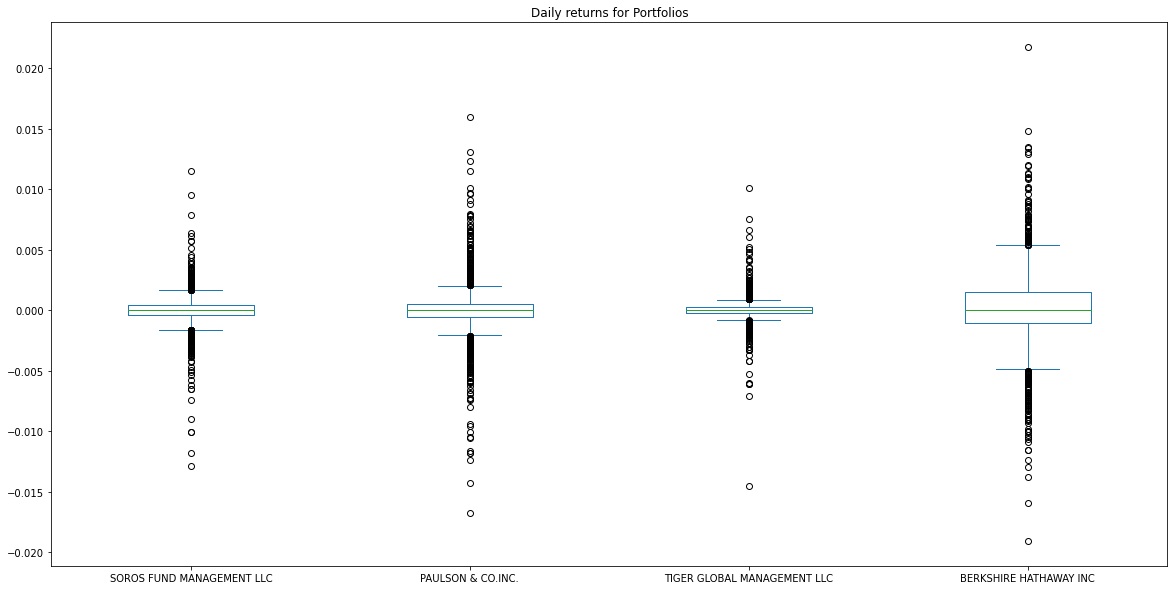

In [9]:
daily_returns_portfolio.plot.box(figsize= (20,10), title= "Daily returns for Portfolios")

#### Step 3: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

#### Observation:
The box plot visualization of the four portfolios  shows `"BERKSHIRE HATHAWAY INC"` is the most volatile fund portfolio with the greatest spread  which is evident from biggest quartiles and longest whiskers whereas `"TIGER GLOBAL MANAGEMENT LLC"` is the least volatile portfolio with the smallest spread.

---

## Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. 
2. Calculate the `annualized standard deviation` for each of the four portfolios and for the S&P 500. 
`(annualized standard deviation= standard deviation * square root of the number of trading days)`
3. Use the daily returns DataFrame and a `21-day rolling window` to `plot the rolling standard deviations` of the four fund portfolios and of the S&P 500 index.
4. Use the daily returns DataFrame and a `21-day rolling window` to plot the rolling standard deviations of only the four fund portfolios.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [10]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
st_dev= daily_returns.std().sort_values()
st_dev


TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [11]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
annualized_stdev= st_dev*np.sqrt(252)
annualized_stdev

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.000866,0.002498,0.000801,0.003624,0.010302
2020-09-08,0.000934,0.002302,0.000817,0.003229,0.012040
2020-09-09,0.000938,0.002186,0.001031,0.003226,0.012789
2020-09-10,0.000976,0.002141,0.000982,0.003271,0.013253
2020-09-11,0.000979,0.002189,0.000986,0.003278,0.012877


<AxesSubplot:title={'center':'Portfolios vs. S&P 500 - 21 Day Rolling Standard Deviation'}, xlabel='date'>

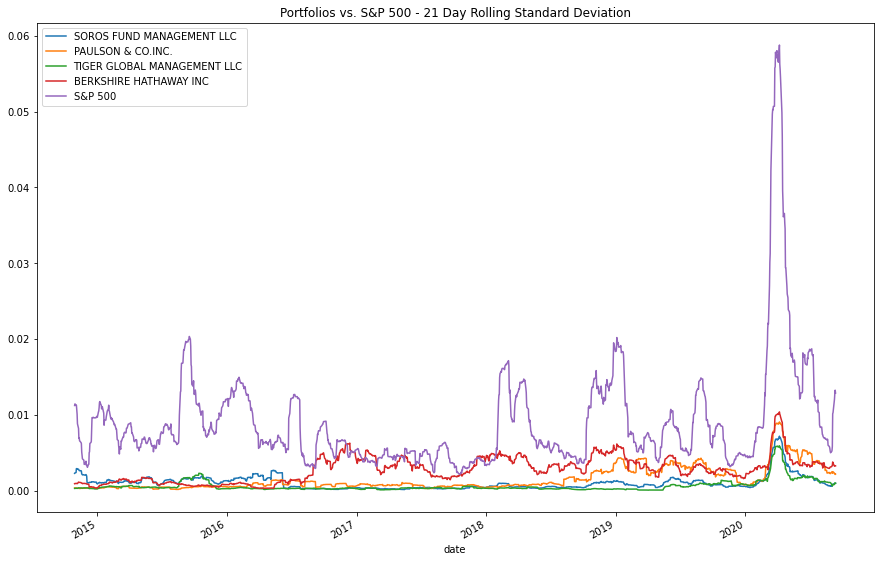

In [31]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
stdev_21= daily_returns.rolling(window=21).std()
display(stdev_21.tail())
stdev_21.plot(figsize=(15,10), title= "Portfolios vs. S&P 500 - 21 Day Rolling Standard Deviation")

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Portfolios - 21 Day Rolling Standard Deviation'}, xlabel='date'>

<AxesSubplot:title={'center':'Portfolios - 21 Day Rolling Standard Deviation'}>

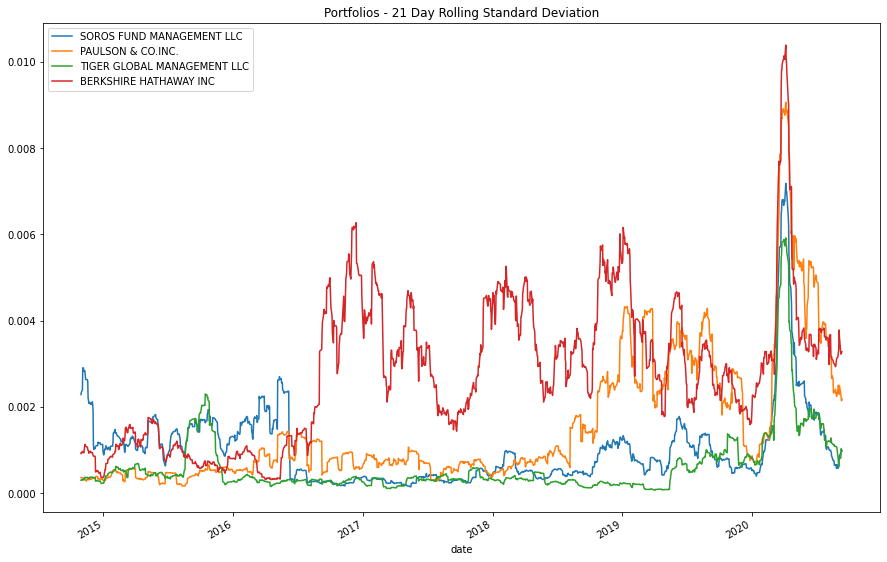

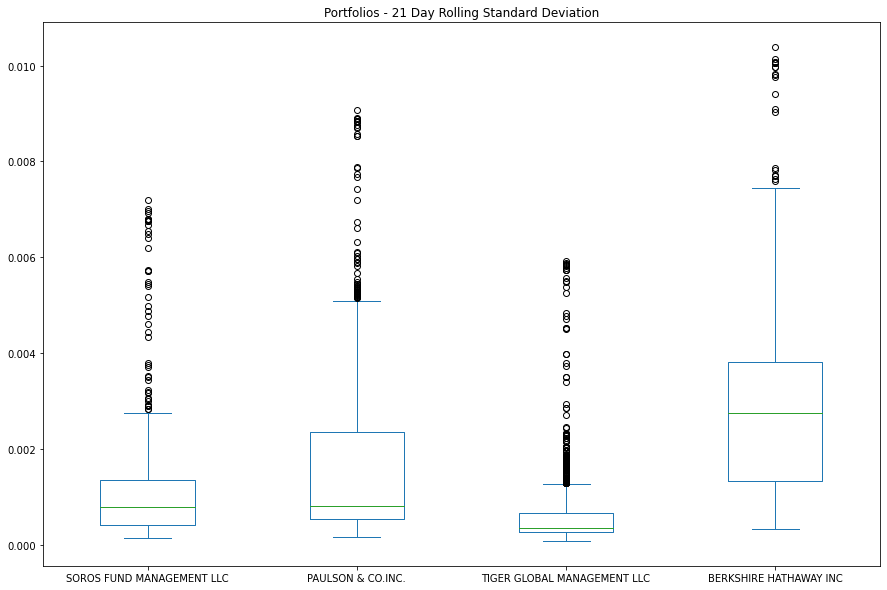

In [32]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
stdev_portfolios_21= daily_returns_portfolio.rolling(window=21).std()

display(stdev_portfolios_21.plot(figsize=(15,10), title= "Portfolios - 21 Day Rolling Standard Deviation"))
display(stdev_portfolios_21.plot.box(figsize=(15,10), title= "Portfolios - 21 Day Rolling Standard Deviation"))

### Step 5:

#### Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

#### Observation:
Looking at the annualized standard deviation data for S&P 500 and the four portfolios, S&P 500 has highest annualized standard deviation of 0.183345 whereas all the portfolios have lesser annualized standard deviation than S&P 500. So none of the portfolio pose more risk than S&P 500.   


#### Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

#### Observation:
Looking at 21 days rolling standard deviation data and its plotfor the portfolios and market, we see that the change in risk of the market(S&P 500) brings the change in risk of portfolios as well, but the increase in risk of S&P 500 does not always leads to increase in the risk of portfolios, and on many intances portfolios' risk decreased with increase in market risk.


#### Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

### Observation:
The 21 day rolling standard deviations of only the fund portfolios show that `BERKSHIRE HATHAWAY INC` is the most volatile portfolio amongst the four which means it poses the most  risk, which is evident from the box plot as well where `BERKSHIRE HATHAWAY INC` has bigger quartiles and longer whiskers than other portfolios.

---

## Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.
2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.
3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.


#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [14]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
trading_days= 252
annualized_average_return= daily_returns.mean() * trading_days
annualized_average_return.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [15]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
annualized_sharpe_ratios = annualized_average_return / annualized_stdev
annualized_sharpe_ratios.sort_values()


PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Sharpe Ratios- Portfolio & S&P 500'}>

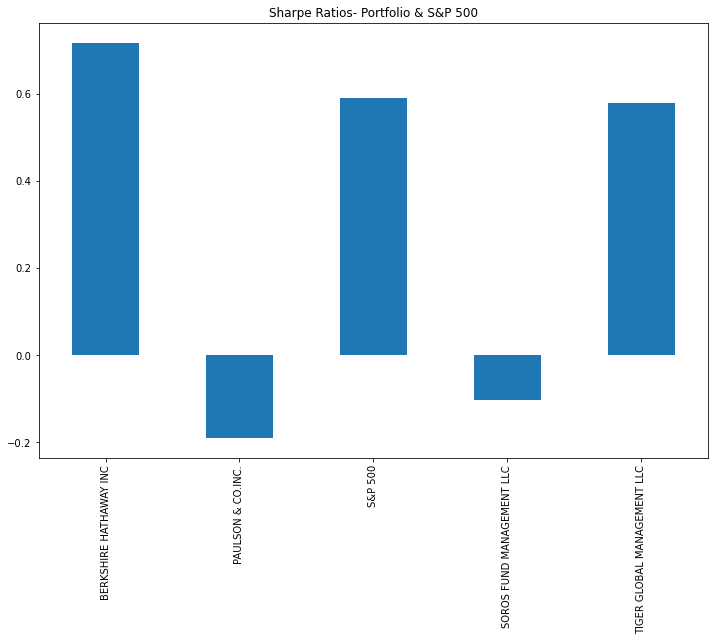

In [37]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
annualized_sharpe_ratios.plot.bar(figsize= (12,8), title= "Sharpe Ratios- Portfolio & S&P 500")


#### Step 4:Which of the four portfolios offers the best risk-return profile? Which offers the worst?

Observation: Out of the four portfolios `Berkshire Hathaway Inc` offers the best risk-return profile with highest Sharpe Ratio of 0.717512 which is even higher than that of the market(S&P 500) i.e. 0.589612. `Paulson & Co.Inc.` offers worst risk-return profile with a negative Sharpe Ratio of -0.189998.
Further we can see from the plot that `Tiger Global Management LLC` also has fair risk-return profile with a positive Sharpe ratio.

---

### Shortlisting the portfolios:
From the analysis done so far for Performance, Volatility, Risk & Risk-return profile of the 4 Portfolios relative to the broader market, we see the two portfolios that offer higher daily returns, cumulative returns and annualized average returns are `Berkshire Hathaway Inc` and `Tiger Global Management LLC` which are also more volatile and responsive to change in market as compared to other portfolios. Also, both of these portfolios have positive Sharpe ratios i.e. better risk-return profile than other portfolios which have negative Sharpe ratios. Thus, we shortlist these two portfolios for further analysis.

---

### Diversify the Portfolio
 
Evaluate how the portfolios react relative to the broader market.

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [17]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
daily_returns_market= daily_returns['S&P 500']
market_rolling_60_variance = daily_returns_market.rolling(window=60).var()
market_rolling_60_variance.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.
2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.
3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.
4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [18]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
berkshire_rolling_60_covariance= daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(daily_returns_market)
berkshire_rolling_60_covariance.tail()


date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [19]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
berkshire_rolling_60_beta = berkshire_rolling_60_covariance / market_rolling_60_variance
berkshire_rolling_60_beta.tail()


date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [20]:
# Calculate the average of the 60-day rolling beta
berkshire_rolling_60_beta.mean()


0.2214986101354593

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC- Rolling 60 Day Beta'}, xlabel='date'>

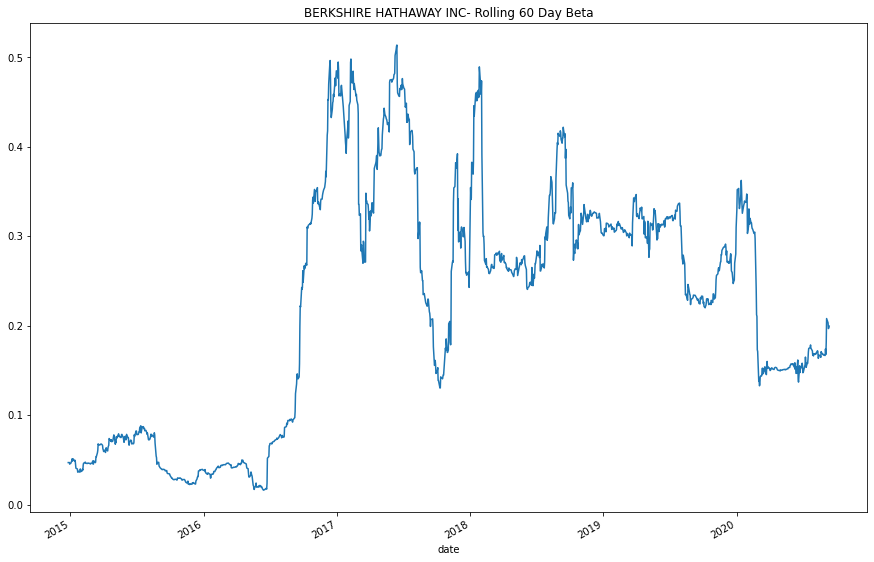

In [34]:
# Plot the rolling beta 
berkshire_rolling_60_beta.plot(figsize= (15,10), title= "BERKSHIRE HATHAWAY INC- Rolling 60 Day Beta")


##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [22]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
tiger_rolling_60_covariance= daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(daily_returns_market)
tiger_rolling_60_covariance.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [23]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
tiger_rolling_60_beta = tiger_rolling_60_covariance / market_rolling_60_variance
tiger_rolling_60_beta.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [35]:
# Calculate the average of the 60-day rolling beta
tiger_rolling_60_beta.mean()

0.03093001487238774

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'TIGER GLOBAL MANAGEMENT LLC- Rolling 60 Day Beta'}, xlabel='date'>

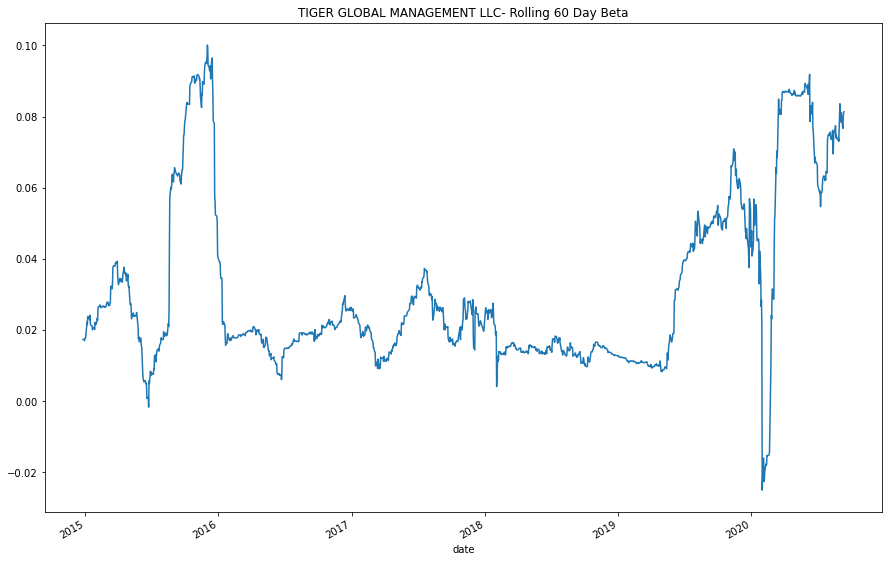

In [36]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
tiger_rolling_60_beta.plot(figsize= (15,10), title= "TIGER GLOBAL MANAGEMENT LLC- Rolling 60 Day Beta")


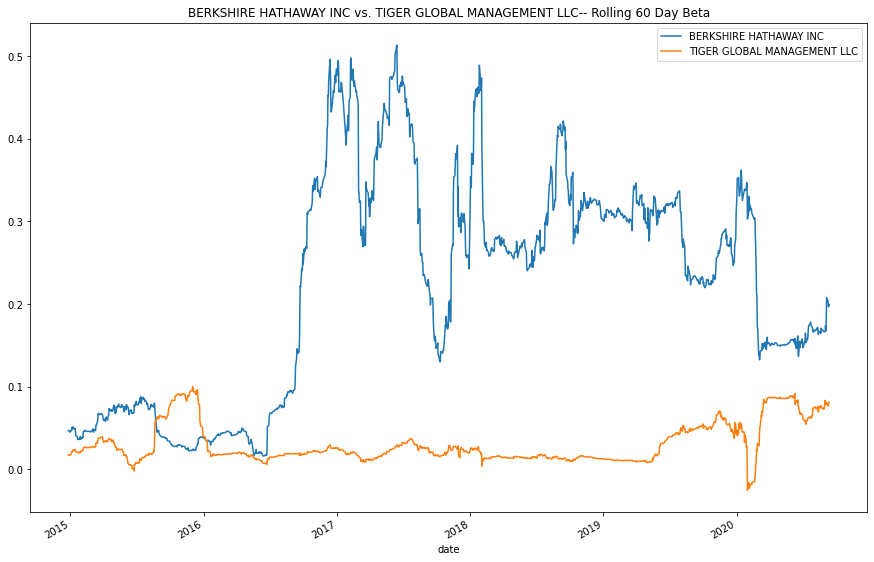

In [26]:
ax= berkshire_rolling_60_beta.plot(figsize= (15,10), title= "BERKSHIRE HATHAWAY INC vs. TIGER GLOBAL MANAGEMENT LLC-- Rolling 60 Day Beta")
tiger_rolling_60_beta.plot(ax=ax)
ax.legend(["BERKSHIRE HATHAWAY INC", "TIGER GLOBAL MANAGEMENT LLC"])


### Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
### Observation:
Beta measures how much an asset's return value is likely to change relative to changes in the overall market’s return value. Here in our analysis, we see that `BERKSHIRE HATHAWAY INC` has higher 60 day rolling beta of 0.2214 than `TIGER GLOBAL MANAGEMENT LLC` which has beta of 0.03093. Thus `BERKSHIRE HATHAWAY INC` is more sensitive to movements in S&P 500 as compared to `TIGER GLOBAL MANAGEMENT LLC`.


### Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
### Observation:
Looking at the analysis done in previous sections, we had shortlisted the two portfolios, wherein  i.e.BERKSHIRE HATHAWAY INC   had higher standard deviation (volatility)but higher sharpe ratio, and TIGER GLOBAL MANAGEMENT LLC. had lower standard deviationc(volatility) and lower sharpe ratio. 
Further we deepened our analysis on these two portfolios by using covariance, beta calculations and overlay visualization of the 60-day rolling betas of the portfolios.It shows that BERKSHIRE HATHAWAY INC with higher beta is more sensitive to movements in S&P 500 exhibiting persistently higher market risk as compared to TIGER GLOBAL MANAGEMENT LLC.

`TIGER GLOBAL MANAGEMENT LLC. seems to be trading with a beta that is closer to the market, and could be the investment choice if looking to invest in conservative of the two portfolios.`

---